## Medical Cost Personnel Insurance Project

**Practice Project Submitted By Bisola Beauty Ayankoya**

## Project Description

Health insurance refers to a form of insurance that provides coverage for medical costs associated with illness. This coverage may encompass expenses related to hospitalization, medication, and consultations with healthcare providers. The primary goal of medical insurance is to ensure access to quality medical treatment without causing financial burden. Health insurance plans provide safeguards against significant healthcare expenses, encompassing hospital stays, day procedures, home-based care, ambulance services, and other related costs. The calculation of medical insurance is determined based on specific factors such as age, body mass index (BMI), number of dependents, smoking status, and geographical region.

**Problem Statement** : accurate prediction of the insurance costs.

In [1]:
# Import all neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset 
df = pd.read_csv('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


**EXPLORATORY ANALYSIS**

In [5]:
# Dataset dimension
df.shape

(1338, 7)

The dataset has 1338 rows and 7 columns.i.e. 1 is **target variable** while the other 6 are **independent variables**.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset are in 3 types(int64,object and float64).

In [7]:
#Column checks
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [9]:
#check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#Confirming checks
df.isnull().sum().sum()

0

The above output shows there are non null values in the dataset

In [11]:
# Checking each column for no of unique values 
df.nunique().to_frame("No.of unique values")

,No.of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

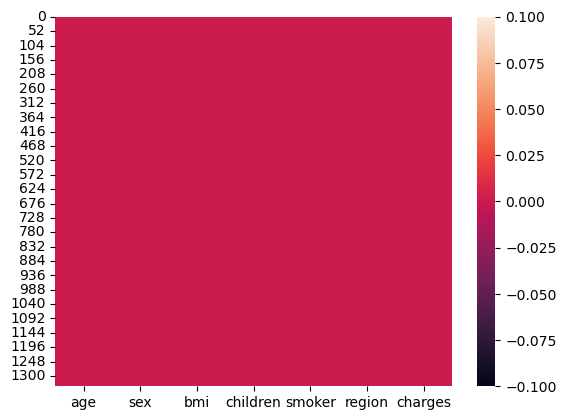

In [13]:
#Visualize using heatmap
sns.heatmap(df.isnull())

The above heatmap visually displays the dataset output, indicating the absence of null values.

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The describe function provides a summary of the data's distribution, including counts, mean, standard deviation, minimum and maximum values, as well as the first quartile 25%(Q1), median 50%(Q2), and third quartile 75%(Q3) of its distribution.

<AxesSubplot:>

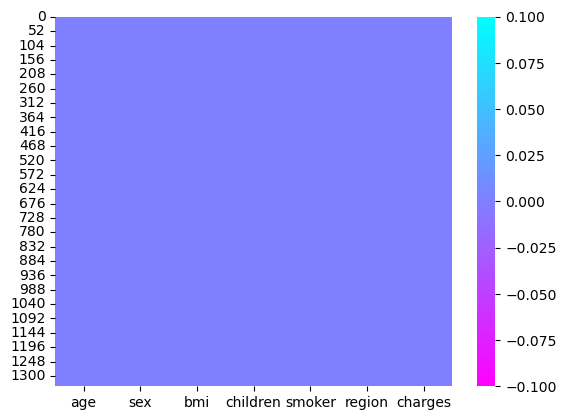

In [15]:
# checking the null values again
sns.heatmap(df.isnull(),cmap = "cool_r")

<AxesSubplot:>

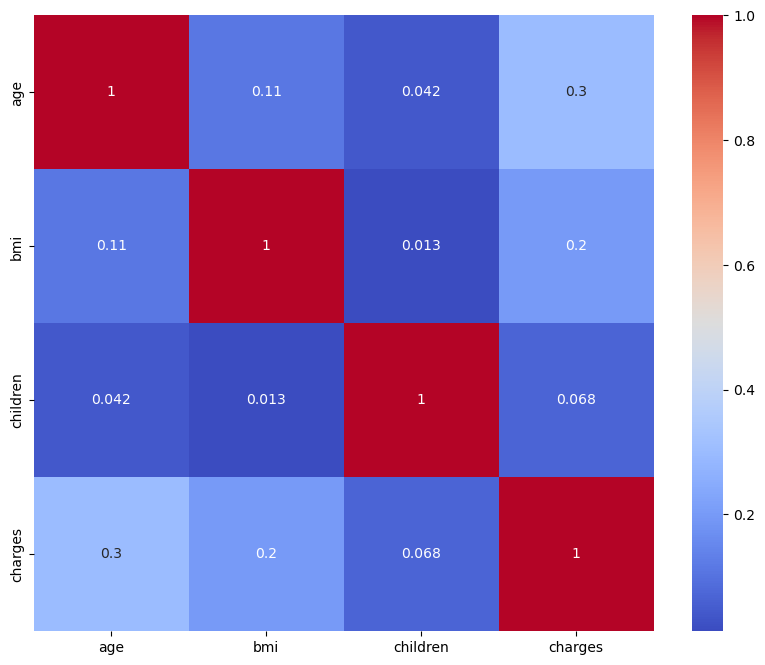

In [16]:
# Correlation Matrix Visualized
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

The correlation output of the dataset identifies the variables that have the most influence on insurance costs and their ranking.The findings indicate that age and BMI are the most influential variables. It is important to note that this analysis is applicable only to numeric data, and other variables such as sex, smoking status, and region may also have significant effects on insurance costs.

In [17]:
#Lets Show the correlation of variables in ascending order with charges 
corr = df.corr()
corr['charges'].sort_values(ascending = False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

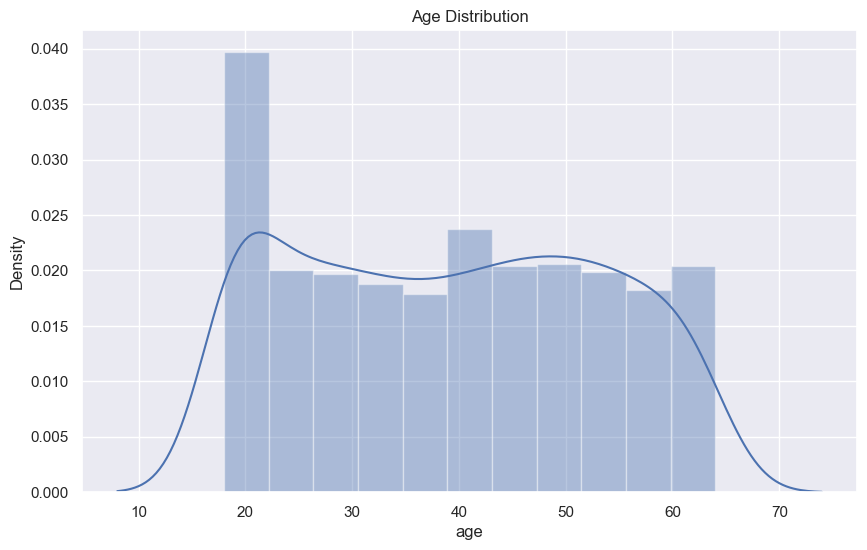

In [18]:
#Distribution of numeric variables - Age
sns.set()
plt.figure(figsize=(10, 6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

male      676
female    662
Name: sex, dtype: int64


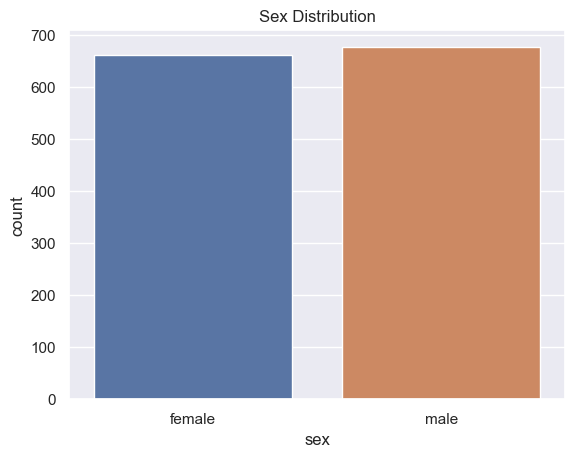

In [19]:
# Visualize the number of churned customers
ax = sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
print(df['sex'].value_counts())

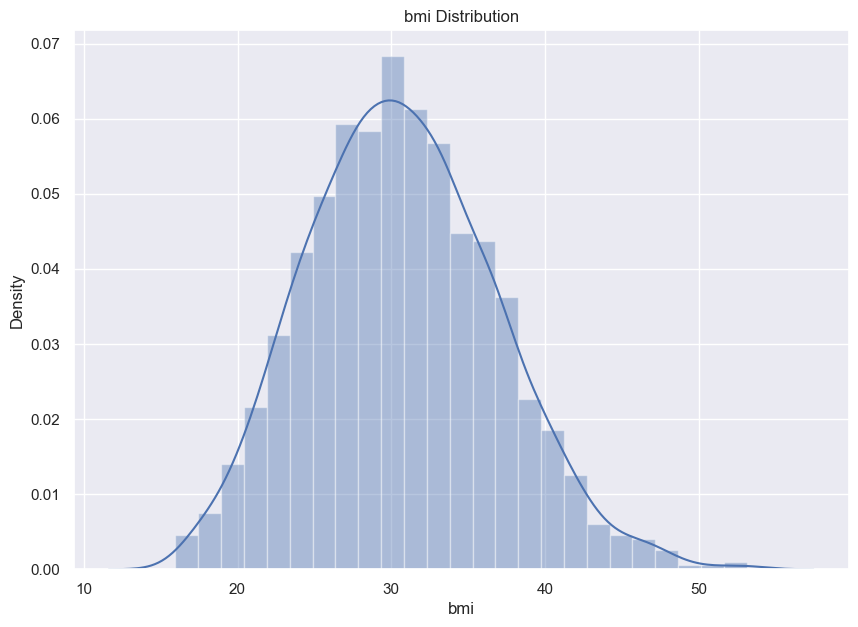

In [20]:
#Distribution of bmi
sns.set()
plt.figure(figsize=(10, 7))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


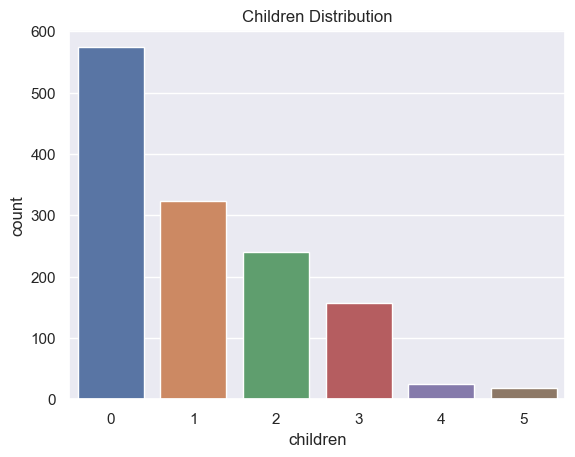

In [21]:
#Distribution of children
print(df['children'].value_counts())
ax = sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()

no     1064
yes     274
Name: smoker, dtype: int64


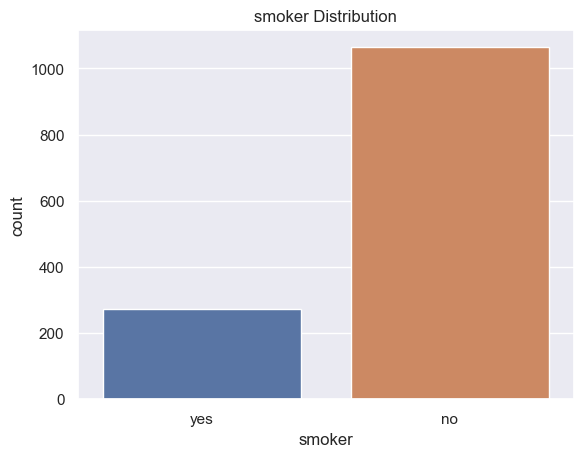

In [22]:
#Visualize the count of Smokers
print(df['smoker'].value_counts())
ax = sns.countplot(x='smoker', data=df)
plt.title('smoker Distribution')
plt.show()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


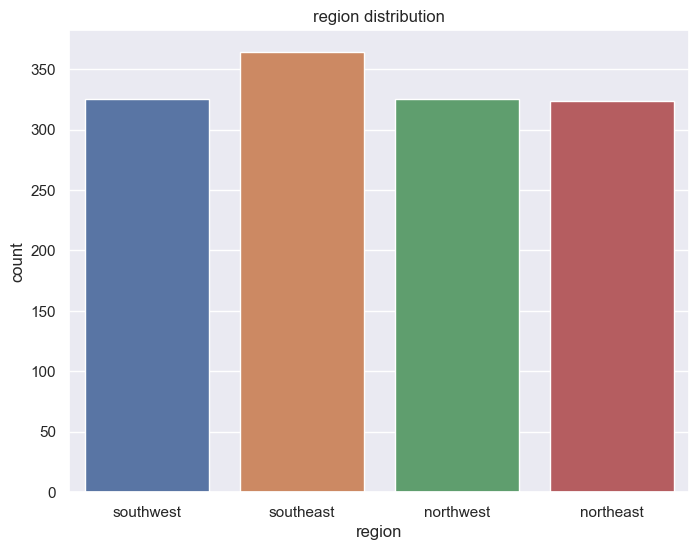

In [23]:
#Regional Distribution
print (df['region'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x = 'region', data=df)
plt.title('region distribution')
plt.show()

**Data Pre-processing and Encoding of categorical columns(variables)**

In [24]:
#encoding Sex, smoker and the region columns
df.replace ({'sex':{'male':1, 'female':0}}, inplace=True)
df.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

The above categorical varaibles have now been decoded to numeric:

sex - male = 1, female = 0
smoker - yes = 1, No = 0
region - 0, 1, 2, and 3 will replace 'southeast, 'southwest', 'northwest and'northeast'. 

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


The dataframe now displays the category columns encoded as numeric values.

**Spliting the varaiables into x and y for the modeling**

In [26]:
#remove columns with low corrlations(region)
x = df.drop(['charges', 'region'], axis=1)
y = df.charges
print(x)

      age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1338 rows x 5 columns]


In [27]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
# Splitting the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
print(x.shape, x_train.shape, y_test.shape)

(1338, 5) (1070, 5) (268,)


## Machine Learning Model

**Linear Regression**

In [30]:
# Creating a Linear Regressor model
lr = LinearRegression()

In [31]:
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
#prediction based on training data for Linear regression
train_data_predlr = lr.predict(x_train)

In [33]:
# determine R-square value for linear regression
r2_train = metrics.r2_score(y_train, train_data_predlr)
print('R Squared :', r2_train) 

R Squared : 0.7410888590280913


In [34]:
#prediction based on testing data for Linear regression
train_data_predlr = lr.predict(x_test)

In [35]:
# determine R-square value for Linear regression
r2_test = metrics.r2_score(y_test, train_data_predlr)
print('R Squared :', r2_test)

R Squared : 0.7811302113434095


**Decision Tree**

In [36]:
# Creating a Decision Tree model
dt = DecisionTreeRegressor()

In [37]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [38]:
#predicting Decision Tree based on training data
train_data_preddt = dt.predict(x_train)

In [39]:
# determine R-square value for decision tree
r2_train = metrics.r2_score(y_train, train_data_preddt)
print('R Squared :', r2_train) 

R Squared : 0.9983078124756305


In [40]:
#prediction based on testing data decision tree
train_data_preddt = dt.predict(x_test)

In [41]:
# determine R-square value for decision tree
r2_test = metrics.r2_score(y_test, train_data_preddt)
print('R Squared :', r2_test)

R Squared : 0.7174776558393778


**K-Nearest Neighbors(KNN) model**


In [42]:
# Creating a K-Nearest Neighbors(KNN) model
knn = KNeighborsRegressor()

In [43]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [44]:
#predicting Knn based on training data
train_data_predknn = knn.predict(x_train)

In [45]:
# determine R-square value for Knn on training data
r2_train = metrics.r2_score(y_train, train_data_predknn)
print('R Squared :', r2_train) 

R Squared : 0.43656452248432975


In [46]:
#prediction based on testing data for knn
train_data_predknn = knn.predict(x_test)

In [47]:
# determine R-square value for Knn
r2_test = metrics.r2_score(y_test, train_data_predknn)
print('R Squared :', r2_test)

R Squared : 0.19719816290911552


**Random Forest Regressor Model**

In [48]:
# Creating a Random Forest model
rf = RandomForestRegressor()

In [49]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
#predicting Random Forest based on training data
train_data_predrf = rf.predict(x_train)

In [51]:
# determine R-square value for Random Forest on training data
r2_train = metrics.r2_score(y_train, train_data_predrf)
print('R Squared :', r2_train) 

R Squared : 0.9731593489174186


In [52]:
#prediction based on testing data for Random Forest
train_data_predrf = rf.predict(x_test)

In [53]:
# determine R-square value for Random Forest
r2_test = metrics.r2_score(y_test, train_data_predrf)
print('R Squared :', r2_test)

R Squared : 0.8590749141559102


The Random Forest Regressor displays strong performance, exhibiting a Train R-squared of 0.97 and Test R-squared of 0.85, indicating exceptional predictive capability and robust generalization. In contrast, Linear Regression shows moderate performance (Train R-squared: 0.74, Test R-squared: 0.78), suggesting a reasonable fit without overfitting. The Decision Tree model achieves a perfect fit on the training data (Train R-squared: 1.00) but demonstrates overfitting with a Test R-squared of 0.71. On the other hand, k-Nearest Neighbors (knn) performs inadequately on both sets (Train R-squared: 0.44, Test R-squared: 0.20), indicating limited generalization and potential variance issues. In summary, the Random Forest Regressor emerges as the superior model, followed by Linear Regression; meanwhile, Decision Tree overfits and knn exhibits poor performance.

**Saving the Models**

In [54]:
# Saving the model using .pkl
import joblib
joblib.dump(rf, "Medical Cost Personnel Insurance Predition.pki")

['Medical Cost Personnel Insurance Predition.pki']

**Predicting the saved model**

In [55]:
# loading the saved model and get the predictions
model = joblib.load("Medical Cost Personnel Insurance Predition.pki")

# prediction
prediction = rf.predict(x_test)
prediction

array([10562.5419787 ,  5525.33335267, 28498.607837  ,  9455.0267167 ,
       34291.896044  ,  8474.4614286 ,  1794.637589  , 14352.462503  ,
        5018.0647127 , 10598.5326401 , 19398.5547646 ,  7249.3481554 ,
        5380.1287613 , 45355.0476548 , 48439.8624755 , 44689.82149   ,
       10044.150591  , 42723.8617748 ,  8359.556324  , 23374.4729021 ,
        9690.9661447 , 10941.8409662 ,  2124.1391023 ,  2043.2686725 ,
       11786.7414996 , 11749.7691908 , 13305.1351985 ,  6661.1570516 ,
       10826.5432125 ,  6676.90636204,  8202.9124608 , 12018.7301693 ,
        2375.1787391 ,  5592.8376867 ,  3909.0261998 ,  8980.3000376 ,
        2933.5812254 ,  8941.9116776 , 23719.4628725 , 39144.3571065 ,
       13562.7337355 ,  3543.2664286 , 11882.8235756 , 13556.1662416 ,
        5866.8799103 , 13270.9558724 , 13994.1506161 , 14518.7118335 ,
       41778.7153469 ,  8046.7846391 , 14120.4317776 ,  3483.0339921 ,
        6899.4945138 ,  1669.2355835 , 11455.8268276 , 10962.2440189 ,
      

These are the predicted Cost of Medical Insurance.

In [56]:
a = np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["original"] = a
df

,predicted,original
0,10562.541979,9095.06825
1,5525.333353,5272.17580
2,28498.607837,29330.98315
3,9455.026717,9301.89355
4,34291.896044,33750.29180
...,...,...
263,47150.705499,47055.53210
264,11981.227989,12222.89830
265,5787.882450,6067.12675
266,47000.236759,63770.42801


In [57]:
# To predict a medical insurance cost for a new customer using the RF model
# we will add the new customer's data into the dataframe
data = {'age': 55, 'sex': 1, 'bmi': 28, 'children' :4, 'smoker': 1}
index = [0]
new_cust_df = pd.DataFrame(data, index)
new_cust_df

,age,sex,bmi,children,smoker
0,55,1,28,4,1


In [58]:
# Predicting cost of medical insurance
cost_pred = rf.predict(new_cust_df)
print("Cost of medical Insurance for a new Customer is: ", cost_pred)

Cost of medical Insurance for a new Customer is:  [26001.3293512]


In [59]:
# Changing the data of the new customer with ( children = 2 and Smoker = 0)
data2 = {'age': 40, 'sex': 1, 'bmi': 20, 'children' :2, 'smoker': 0}
index = [0]
new_cust_df2 = pd.DataFrame(data2, index)
new_cust_df2

,age,sex,bmi,children,smoker
0,40,1,20,2,0


In [60]:
# Cost prediction of medical insurance
cost_pred = rf.predict(new_cust_df2)
print("Cost of medical Insurance for new Customer is: ", cost_pred)

Cost of medical Insurance for new Customer is:  [7998.3812921]


**Conclusion** As shown,a substantial decrease in medical insurance costs is observed when factors such as age, number of children, and smoking status are lower. This indicates that attributes such as age, number of children, and smoking status have a significant impact on determining medical insurance costs.